In [1]:
# imports
from Helpers.Mantels_Helpers import extract_all_files, create_tasks_for_parrelization, get_embeddings, mantel_test

2025-01-14 11:46:02.297059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-14 11:46:02.318367: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-14 11:46:02.324916: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 11:46:02.340456: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-14 11:46:04.268165: W tensorflow/compiler/tf2

# Mantel's correlation Tests
 
- Brought to by the one and only Adam and the one and only Marshall

In [4]:
# Test extract all files
df = extract_all_files()
df.sample(5) 

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
2087,MASH-,hepatitis,turn,0.3,"{'knn': 8, 'page_rank': 'None', 'DTM': 'log', ...","{'42': 0.7898550724637681, '1738': 0.789855072...","{'42': 0.0004988447805082966, '1738': 0.000367...","{'42': 0.7454545454545455, '1738': 0.731818181...","{'42': 0.6964285714285714, '1738': 0.696428571...","{'42': 0.75, '1738': 0.6428571428571429, '5271...","{'42': 0.7549407114624506, '1738': 0.619047619...","{'42': 0.7004188935432616, '1738': 0.684457605...","{'42': {'RF-OOB': 0.7136363636363636, 'KNN': 0...","{'knn': 0.028175268888522235, 'page_rank': 1.3..."
89,RF-SPUD,ComputerHardware,skewed,0.3,"{'knn': 47, 'OD_method': 'default', 'agg_metho...",{'42': 0.12458860947362882},{'42': 0.00029761223415214857},{'42': 0.2147721223858291},{'42': 0.11371433689152266},{'42': 0.12471704339710066},{'42': 1.3124818923855543},{'42': 1.320705378249571},"{'42': {'RF-OOB': 0.13155178584666471, 'KNN': ...",{}
2486,RF-NAMA,titanic,even,0.3,"{'OD_method': 'mean', 'agg_method': 'log'}",{'42': 0.6558988764044944},{'42': 0.0},{'42': 0.6036906854130053},{'42': 0.583916083916084},{'42': 0.5664335664335665},{'42': 0.5243109646964421},{'42': 0.5741484542414811},"{'42': {'RF-OOB': 0.7196836555360281, 'KNN': 0...",{}
1272,NAMA,AirfoilSelfNoise,turn,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': -0.13546029793315273, '1738': -0.135460...","{'42': 4.426719858132482e-07, '1738': 4.426719...","{'42': -0.0025682324019746794, '1738': -0.0106...","{'42': 0.0686596501886666, '1738': 0.048539590...","{'42': 0.008357817713723126, '1738': 0.0083914...","{'42': 1.0217053488328993, '1738': 1.000352007...","{'42': 0.9901531655455021, '1738': 0.979891717...","{'42': {'RF-OOB': 0.013185415935930589, 'KNN':...","{'OD_method': 0.1672682206830043, 'agg_method'..."
288,MASH,CommunityCrime,random,0.3,"{'knn': 2, 'page_rank': 'full', 'DTM': 'log', ...","{'42': 0.5913345587812715, '1738': 0.600013237...","{'42': 0.00926953377685715, '1738': 0.00926953...","{'42': 0.5815267780573992, '1738': 0.575662781...","{'42': 0.5690821118863889, '1738': 0.600039574...","{'42': 0.5906612532126092, '1738': 0.583253257...","{'42': 0.6009829134571809, '1738': 0.643815024...","{'42': 0.6166204989352975, '1738': 0.630715510...","{'42': {'RF-OOB': 0.5760220518234036, 'KNN': 0...","{'connection_limit': 0.006944955126345572, 'th..."


In [5]:
# Test to create tasks
tasks = create_tasks_for_parrelization(df)
tasks[:2]

[('RF-SPUD',
  'ComputerHardware',
  'even',
  {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'}),
 ('RF-MASH-',
  'ComputerHardware',
  'distort',
  {'knn': 2,
   'page_rank': 'full',
   'DTM': 'log',
   'density_normalization': False})]

In [7]:
#Select the part where its iris data set for ease :)
iris_task = next(task for task in tasks if 'iris' in task[1])
print(iris_task)

('SPUD', 'iris', 'turn', {'knn': 10, 'OD_method': 'default', 'agg_method': 'log'})


In [5]:
#Test get embeddings fucntion
partial, pred, full, full_labels, pred_labels = get_embeddings(*iris_task, return_labels=True)

240 300 300


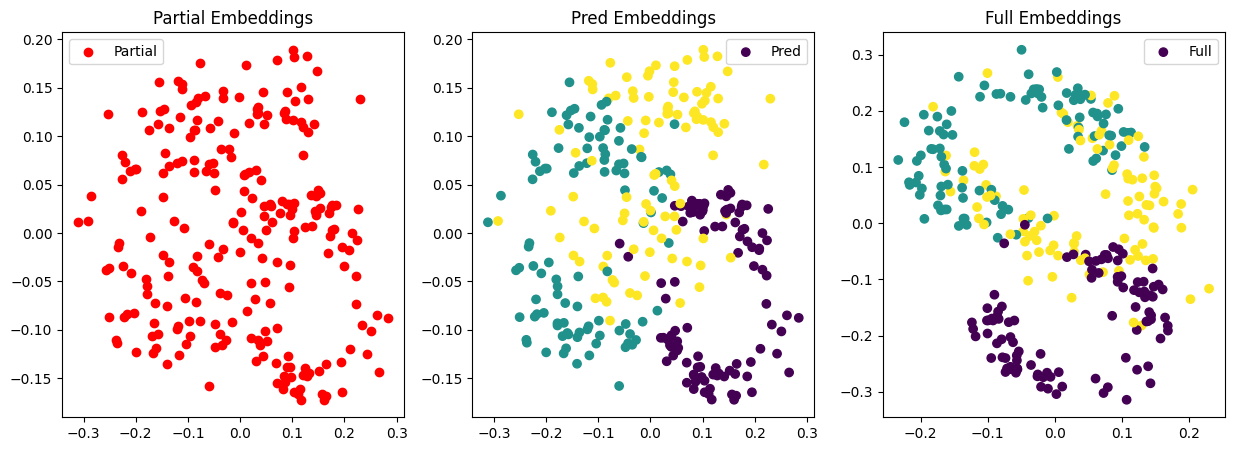

In [6]:
import matplotlib.pyplot as plt

#See if the sizes are correct
print(len(partial), len(pred), len(full))

#Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels, label='Pred')
axes[1].set_title('Pred Embeddings')
axes[1].legend()

axes[2].scatter(full[:, 0], full[:, 1], c=pred_labels, label='Full') #NOTE TO MARTIAL -> YOU WANT TO MAKE SURE THE POINTS AREN'T SHUFFLED
axes[2].set_title('Full Embeddings')
axes[2].legend()

plt.show()

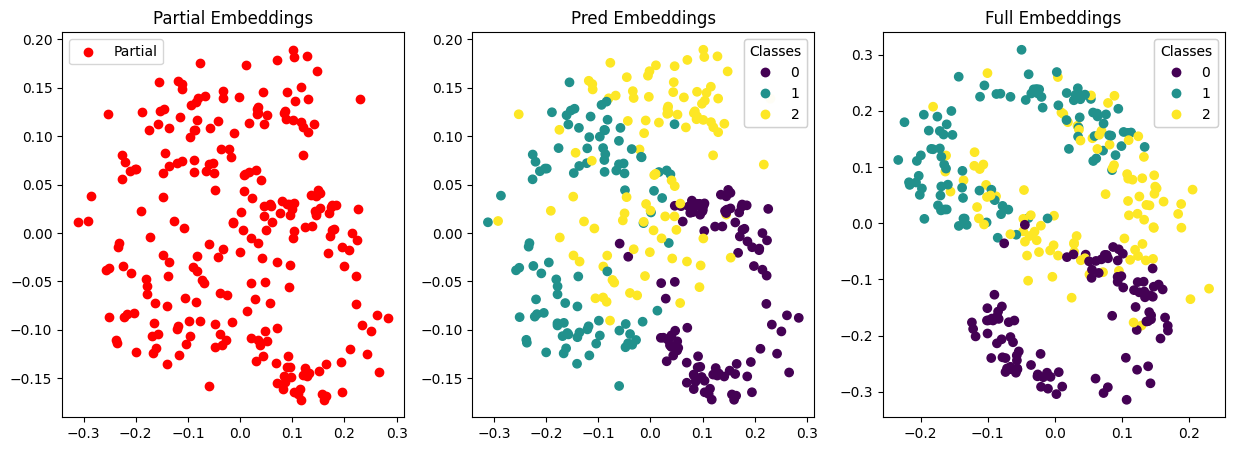

In [7]:
# Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

scatter_pred = axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels)
axes[1].set_title('Pred Embeddings')
legend_pred = axes[1].legend(*scatter_pred.legend_elements(), title="Classes")
axes[1].add_artist(legend_pred)

scatter_full = axes[2].scatter(full[:, 0], full[:, 1], c=full_labels)
axes[2].set_title('Full Embeddings')
legend_full = axes[2].legend(*scatter_full.legend_elements(), title="Classes")
axes[2].add_artist(legend_full)

plt.show()

('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


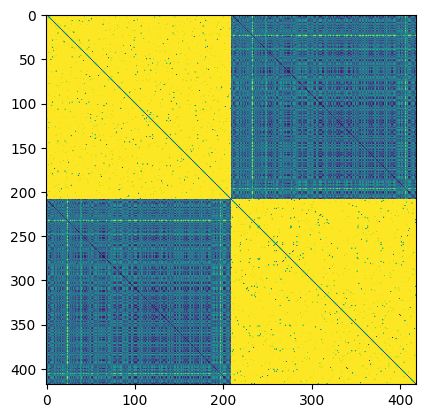

In [8]:
print(tasks[0])
emb_pred, emb_full, block_full = get_embeddings(*tasks[0], return_labels=False)
plt.imshow(block_full)

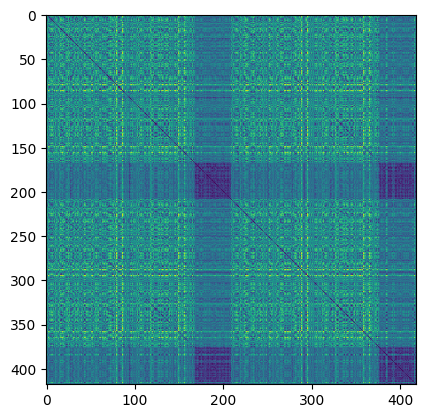

In [9]:
from scipy.spatial.distance import pdist, squareform
plt.imshow(squareform(pdist(emb_pred)))
#plt.imshow(squareform(pdist(emb_full)))

# Marshall's Tests here?

In [8]:
r_obs, p_value = mantel_test(*iris_task, plot = True)
print(*iris_task)
print(r_obs, p_value)

Results already exist for SPUD, iris, turn.
Plotting is disabled for existing files.
SPUD iris turn {'knn': 10, 'OD_method': 'default', 'agg_method': 'log'}
nan nan


('RF-NAMA', 'ComputerHardware', 'skewed', {'OD_method': 'mean', 'agg_method': 'log'})


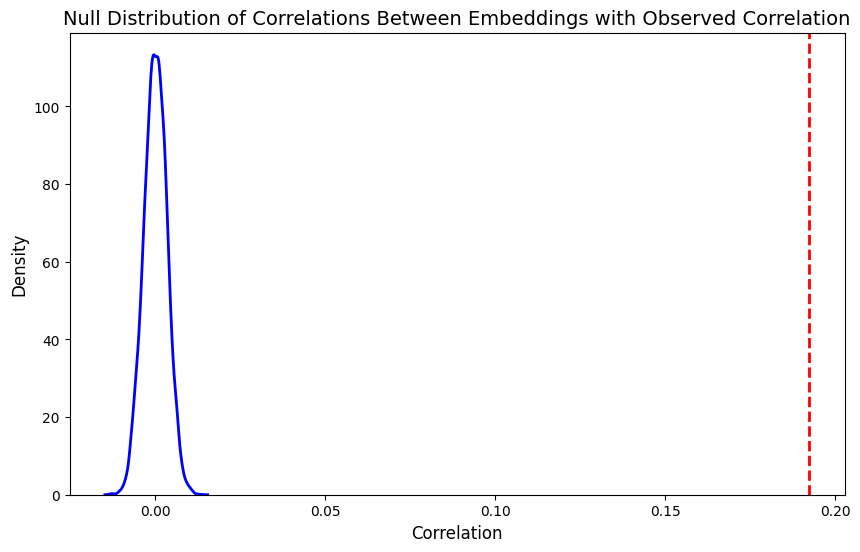

Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-NAMA_ComputerHardware_skewed.json
0.19235082176108834 0.0
('MASH-', 'ComputerHardware', 'distort', {'knn': 7, 'page_rank': 'None', 'DTM': 'log', 'density_normalization': True})


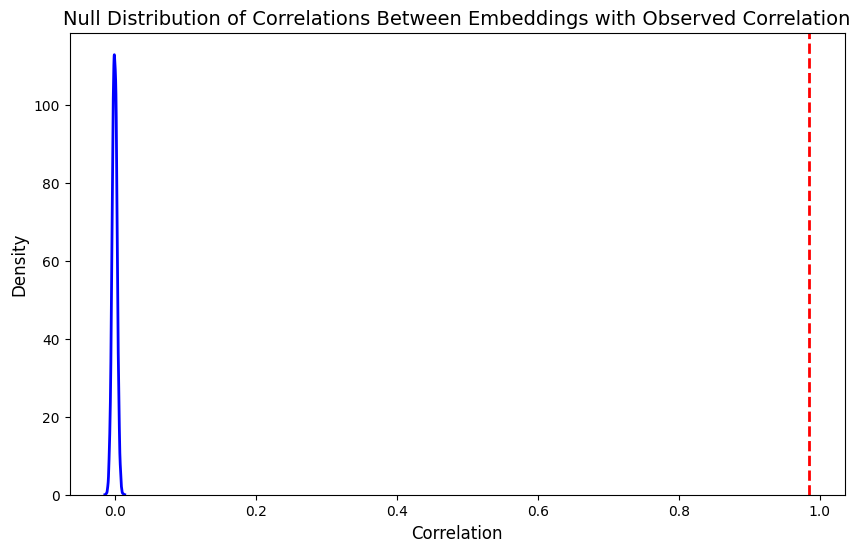

Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/MASH-_ComputerHardware_distort.json
0.9851925097392106 0.0
('RF-SPUD', 'ComputerHardware', 'random', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


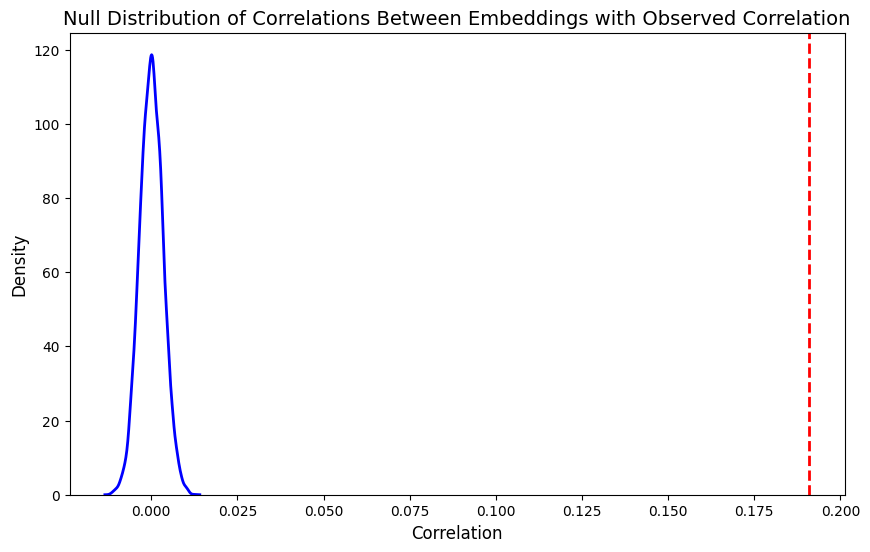

Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-SPUD_ComputerHardware_random.json
0.19100326007925084 0.0
('SPUD', 'ComputerHardware', 'skewed', {'knn': 17, 'OD_method': 'default', 'agg_method': 'log'})
Results already exist for SPUD, ComputerHardware, skewed.
Plotting is disabled for existing files.
nan nan
('SPUD', 'ComputerHardware', 'distort', {'knn': 22, 'OD_method': 'mean', 'agg_method': 'log'})
Results already exist for SPUD, ComputerHardware, distort.
Plotting is disabled for existing files.
nan nan


In [12]:
#Unpack all the code and run the mantel test
for i in range(5):
    task_to_run = tasks[i+14]
    print(task_to_run)
    r_obs, p_value = mantel_test(method = task_to_run[0], dataset=task_to_run[1], split = task_to_run[2], params = task_to_run[3], plot = True)
    print(r_obs, p_value)

In [18]:
# Testing parralization loop
#Imports
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

with tqdm_joblib(tqdm(total=5)): #This includ]==s a progress bar :)
    with Parallel(n_jobs=-1) as parallel:
        parallel(
            delayed(mantel_test)(*task)
            for task in tasks[103:108]
        )



2025-01-14 11:42:33.690476: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-14 11:42:33.708261: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-14 11:42:33.713678: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 11:42:33.726841: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-14 11:42:35.574236: W tensorflow/compiler/tf

Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/NAMA_Hydrodynamics_distort.json


Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/MASH-_Hydrodynamics_even.json


Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-SPUD_Hydrodynamics_skewed.json


Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-MASH-_Hydrodynamics_turn.json



100%|██████████| 5/5 [01:53<00:00, 22.74s/it]

Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel/RF-SPUD_Hydrodynamics_distort.json


# Vizualizations

In [1]:
from Helpers.Mantels_Helpers import read_all_mantel_results, plot_averaged_mantel_stats

2025-01-14 11:49:58.407764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-14 11:49:58.428538: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-14 11:49:58.434887: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 11:49:58.450589: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-14 11:50:00.013483: W tensorflow/compiler/tf2

In [ ]:
mantel_df = read_all_mantel_results().dropna()
mantel_df

,method,dataset,split,r_obs,p_value,five_point_summary
0,RF-SPUD,Hydrodynamics,distort,0.112999,0.0,"{'min': -0.00827523911200166, 'Q1': -0.0015750..."
1,SPUD,ComputerHardware,random,0.886269,0.0,"{'min': -0.01262857674470666, 'Q1': -0.0023140..."
3,RF-MASH-,Hydrodynamics,turn,0.564247,0.0,"{'min': -0.008737444526332797, 'Q1': -0.001562..."
5,RF-SPUD,ComputerHardware,turn,0.396331,0.0,"{'min': -0.011613057640805615, 'Q1': -0.002247..."
6,RF-MASH,ComputerHardware,skewed,0.602826,0.0,"{'min': -0.014162918773286867, 'Q1': -0.002343..."
7,RF-MASH,ComputerHardware,turn,0.896503,0.0,"{'min': -0.013187719003694065, 'Q1': -0.002177..."
8,NAMA,Hydrodynamics,distort,0.384082,0.0,"{'min': -0.008464049214022449, 'Q1': -0.001594..."
9,RF-SPUD,ComputerHardware,skewed,0.187491,0.0,"{'min': -0.015229768677254939, 'Q1': -0.002301..."
11,NAMA,ComputerHardware,turn,0.823652,0.0,"{'min': -0.011990141671938867, 'Q1': -0.002153..."
12,RF-SPUD,ComputerHardware,even,0.063911,0.0,"{'min': -0.012765785742436005, 'Q1': -0.002344..."


In [3]:
print(f"Mean P-Value: {mantel_df['p_value'].mean()}")
print(f"Minimun P-value: {mantel_df['p_value'].min()}")
print(f"Maximum P-value: {mantel_df['p_value'].max()}")

#The following will error if all the p_values are 0
if mantel_df["p_value"].max() == 0:
    print("All P-Values are 0 -- cannot plot")
else:
    mantel_df["p_value"].plot(kind="kde", title="P-Value Distribution", figsize=(10, 5))

Mean P-Value: 0.0
Minimun P-value: 0.0
Maximum P-value: 0.0
All P-Values are 0 -- cannot plot


Mean r_obs: 0.5297316043874714
Minimun r_obs: 0.06391071339759141
Maximum r_obs: 0.9530146268679289


<Axes: title={'center': 'r_obs Distribution'}, ylabel='Density'>

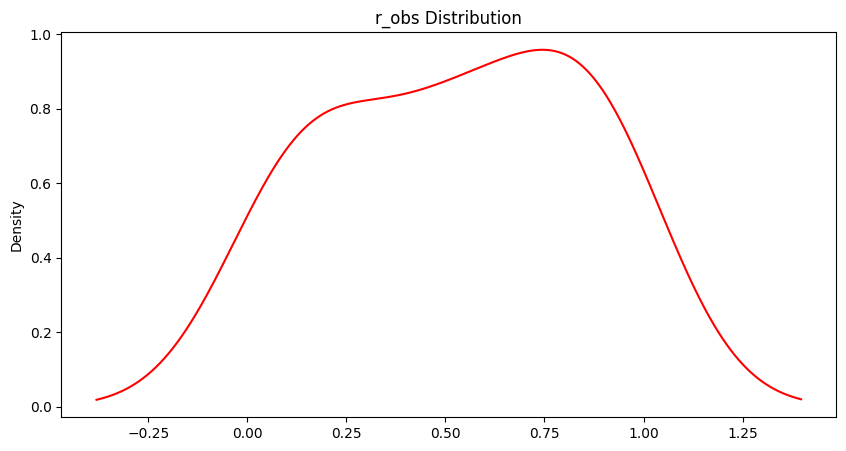

In [4]:
print(f"Mean r_obs: {mantel_df['r_obs'].mean()}")
print(f"Minimun r_obs: {mantel_df['r_obs'].min()}")
print(f"Maximum r_obs: {mantel_df['r_obs'].max()}")
mantel_df["r_obs"].plot(kind="kde", title="r_obs Distribution", figsize=(10, 5), c = "red")

TypeError: unsupported operand type(s) for /: 'dict' and 'int'

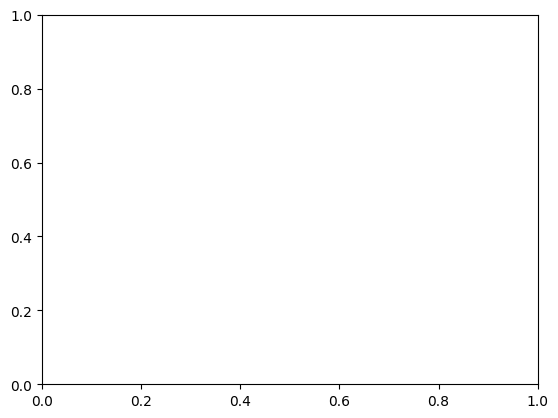

In [5]:
plot_averaged_mantel_stats(mantel_df)